In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

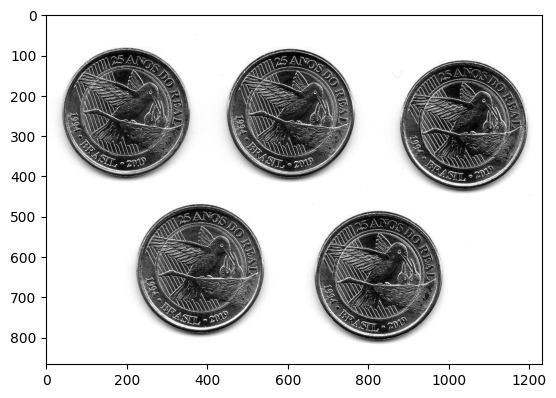

In [11]:
img = cv.imread("images/moedas.webp")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")

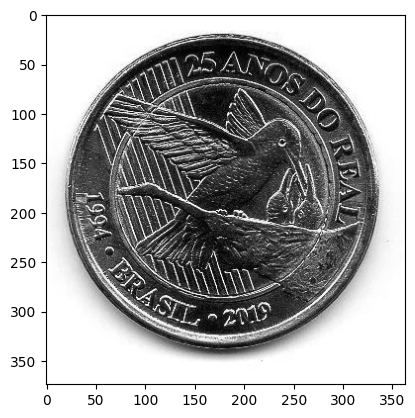

In [12]:
template = cv.imread("images/moedastemplate.png")
template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

w, h = template.shape[::-1]
bordas_x = w - 1
bordas_y = h - 1

plt.imshow(template, cmap="gray")

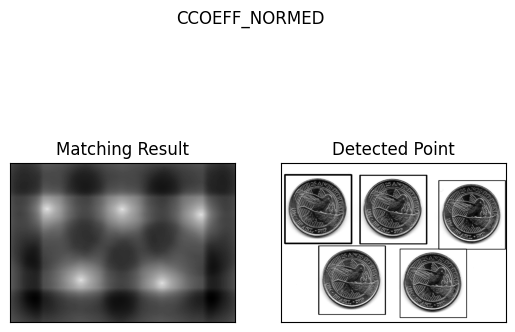

In [13]:
img2 = img.copy()
border_img = cv.copyMakeBorder(img, bordas_y//2, bordas_y//2, bordas_x//2, bordas_x//2, cv.BORDER_CONSTANT, value=0)
res = cv.matchTemplate(border_img,template,cv.TM_CCOEFF_NORMED)

threshold = 0.8
loc = np.where( res >= threshold)


for pt in zip(*loc[::-1]):
    adjusted_pt = (pt[0] - bordas_x//2, pt[1] - bordas_y//2)
    cv.rectangle(img2, adjusted_pt, (adjusted_pt[0] + w, adjusted_pt[1] + h), (0,0,255), 2)

plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle("CCOEFF_NORMED")
 
plt.show()

5


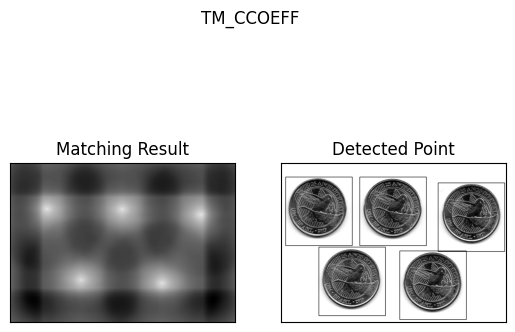

In [14]:
def non_max_suppression_fast(boxes, overlap_thresh):
    if len(boxes) == 0:
        return []

    boxes = np.array(boxes, dtype="float")
    pick = []
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        overlap = (w * h) / area[idxs[:last]]

        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlap_thresh)[0])))

    return boxes[pick].astype("int")

img2 = img.copy()
border_img = cv.copyMakeBorder(img, bordas_y//2, bordas_y//2, bordas_x//2, bordas_x//2, cv.BORDER_CONSTANT, value=0)

resultado = cv.matchTemplate(border_img, template, cv.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(resultado)

threshold = 0.7
loc = np.where(resultado >= threshold * max_val)

# Defina bordas_x e bordas_y com base no tamanho do template
bordas_x, bordas_y = template.shape[::-1]

# Lista para armazenar os retângulos
rectangles = []

# Adiciona as coordenadas dos retângulos
for pt in zip(*loc[::-1]):
    adjusted_pt = (pt[0] - bordas_x // 2, pt[1] - bordas_y // 2)
    rectangles.append([adjusted_pt[0], adjusted_pt[1], adjusted_pt[0] + w, adjusted_pt[1] + h])

# Aplica Non-Maximum Suppression (NMS)
filtered_rectangles = non_max_suppression_fast(rectangles, overlap_thresh=0.3)

print(len(filtered_rectangles))
# Desenha os retângulos filtrados
for (x1, y1, x2, y2) in filtered_rectangles:
    cv.rectangle(img2, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Exibe os resultados
plt.subplot(121), plt.imshow(resultado, cmap='gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(img2, cmap='gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

plt.suptitle("TM_CCOEFF")
plt.show()

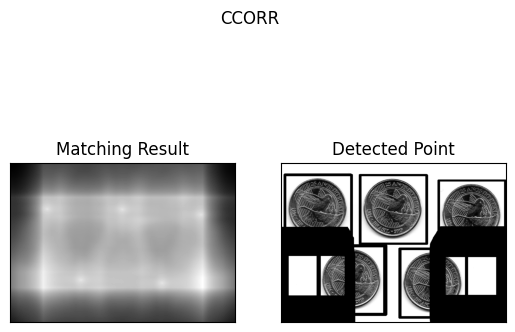

In [15]:
img2 = img.copy()
border_img = cv.copyMakeBorder(img, bordas_y//2, bordas_y//2, bordas_x//2, bordas_x//2, cv.BORDER_CONSTANT, value=0)

resultado = cv.matchTemplate(border_img, template, cv.TM_CCORR)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(resultado)


threshold = 0.9

loc = np.where(resultado >= threshold * max_val)

for pt in zip(*loc[::-1]):
    adjusted_pt = (pt[0] - bordas_x//2, pt[1] - bordas_y//2)
    cv.rectangle(img2, adjusted_pt, (adjusted_pt[0] + w, adjusted_pt[1] + h), (0, 255, 0), 2)

plt.subplot(121),plt.imshow(resultado,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle("CCORR")

plt.show()

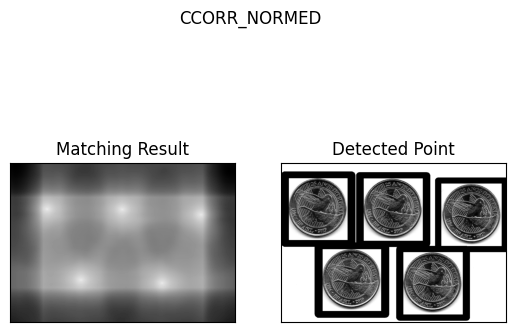

In [16]:
img2 = img.copy()
border_img = cv.copyMakeBorder(img, bordas_y//2, bordas_y//2, bordas_x//2, bordas_x//2, cv.BORDER_CONSTANT, value=0)


resultado = cv.matchTemplate(border_img, template, cv.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(resultado)

threshold = 0.9  

loc = np.where(resultado >= threshold * max_val)


for pt in zip(*loc[::-1]):
    adjusted_pt = (pt[0] - bordas_x//2, pt[1] - bordas_y//2)
    cv.rectangle(img2, adjusted_pt, (adjusted_pt[0] + w, adjusted_pt[1] + h), (0, 255, 0), 2)

plt.subplot(121),plt.imshow(resultado,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle("CCORR_NORMED")

plt.show()

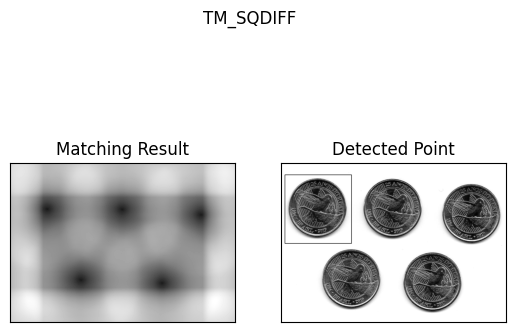

(868, 1232)
(867, 1232)


In [17]:
img2 = img.copy()
border_img = cv.copyMakeBorder(img, bordas_y//2, bordas_y//2, bordas_x//2, bordas_x//2, cv.BORDER_CONSTANT, value=0)

resultado = cv.matchTemplate(border_img, template, cv.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(resultado)

threshold = 1.5
loc = np.where(resultado <= min_val * threshold)

for pt in zip(*loc[::-1]):
    adjusted_pt = (pt[0] - bordas_x//2, pt[1] - bordas_y//2)
    cv.rectangle(img2, adjusted_pt, (adjusted_pt[0] + w, adjusted_pt[1] + h), (0, 255, 0), 2)

plt.subplot(121),plt.imshow(resultado,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle("TM_SQDIFF")

plt.show()

print(resultado.shape)
print(img.shape)

(array([251]), array([202]))


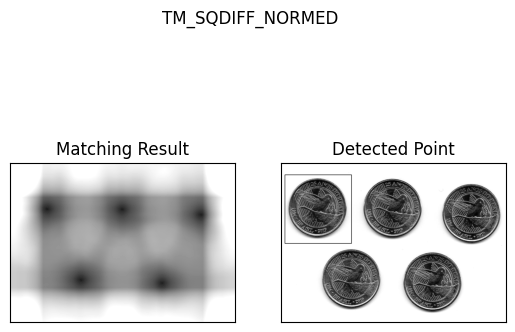

In [18]:
img2 = img.copy()
border_img = cv.copyMakeBorder(img, bordas_y//2, bordas_y//2, bordas_x//2, bordas_x//2, cv.BORDER_CONSTANT, value=0)

resultado = cv.matchTemplate(border_img, template, cv.TM_SQDIFF_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(resultado)

threshold = 1

loc = np.where(resultado <= min_val * threshold)
print(loc)

for pt in zip(*loc[::-1]):
    adjusted_pt = (pt[0] - bordas_x//2, pt[1] - bordas_y//2)
    cv.rectangle(img2, adjusted_pt, (adjusted_pt[0] + w, adjusted_pt[1] + h), (0, 255, 0), 2)

plt.subplot(121),plt.imshow(resultado,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle("TM_SQDIFF_NORMED")

plt.show()